In [356]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#pip install sqlalchemy
#pip install mysql-connector-python
from skimage import data
from skimage import io

In [226]:
movies = pd.read_csv('IMDB-Movie-Data.csv')

In [259]:
print(movies['Votes'].max())
print(movies['Votes'].min())

1791916
178


In [442]:
## Most popular genre and its' generated revenues

In [447]:
movies.shape

(838, 14)

In [449]:
## Testing if the number of description words have something to do with the IMDb rating being higher

In [453]:
movies

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore,Description_words,IMDb_rating_Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,21,84.1
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,24,72.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,27,69.3
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,37,66.2
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,27,46.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0,40,42.9
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0,29,54.7
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,19,51.5
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,17,56.2


In [454]:
movies['Runtime'].max()

187

In [464]:
sns.set_theme(style="darkgrid")

In [466]:
## Testing to see correlation between IMDb rating and runtime. Does the length of movie (in minutes) have impact on the IMDb ratings?

# It can be seen that there is some sort of positive correlation between the two variables, although it's not close to being perfect.
# In general, the longer the movie, the higher IMDb rating is. It's not entirely true, but some sort of positive correlation can be seen.

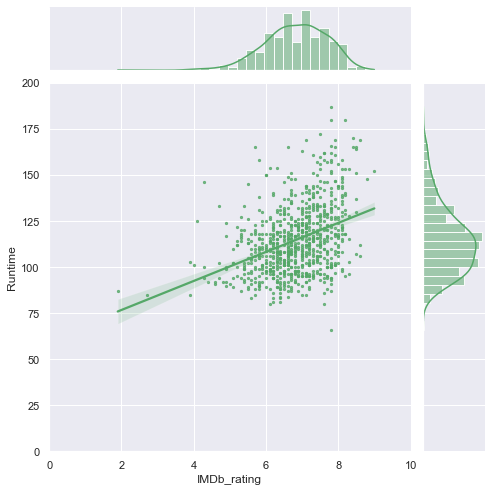

In [473]:
runtime_IMDbrating = sns.jointplot(x="IMDb_rating", y="Runtime", data=movies,
                  kind="reg",
                  xlim=(0, 10), ylim=(0, 200),
                  scatter_kws={"s": 5},
                  color="g", height=7)

## Did the most popular director in each of the following year intervals: 2006 to 2009; 2010 - 2016 (taking into consideration IMDd rating and the count of the votes) generated the most revenue?

In [252]:
movies

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore,Description_words
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,21
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,24
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,27
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,37
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0,40
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0,29
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,19
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,17


In [251]:
movies.info() # Cleaned data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               838 non-null    int64  
 1   Title              838 non-null    object 
 2   Genre              838 non-null    object 
 3   Description        838 non-null    object 
 4   Director           838 non-null    object 
 5   Actors             838 non-null    object 
 6   Year               838 non-null    int64  
 7   Runtime            838 non-null    int64  
 8   IMDb_rating        838 non-null    float64
 9   Votes              838 non-null    int64  
 10  Revenue            838 non-null    float64
 11  Metascore          838 non-null    float64
 12  Description_words  838 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 123.9+ KB


In [250]:
movies.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore,Description_words
count,838.000000,838,838,838,838,838,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000,838.000000
unique,NaN,837,189,838,524,834,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,485.247017,NaN,NaN,NaN,NaN,NaN,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179,28.056086
std,286.572065,NaN,NaN,NaN,NaN,NaN,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416,8.651514
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000,9.000000
25%,238.250000,NaN,NaN,NaN,NaN,NaN,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000,22.000000
50%,475.500000,NaN,NaN,NaN,NaN,NaN,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000,27.000000
75%,729.750000,NaN,NaN,NaN,NaN,NaN,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000,34.000000


In [230]:
movies['Description_len'] = movies['Description'].map(len) # Adding new column using map function to identify the length of each description (will use it to identify does the description length
# have influence on the rating)

In [231]:
def word_count(txt):
    return len(txt.split())

In [249]:
movies['Description_words'] = movies['Description'].map(word_count)
movies.head(2)

/var/folders/d0/hq4rwgj90r72xzxl8829mkn00000gn/T/ipykernel_35207/1726154656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Description_words'] = movies['Description'].map(word_count)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore,Description_words
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,21
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,24


In [233]:
movies['Year'].value_counts() # 2016 was the most popular year for releasing new movies

2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

In [268]:
movies[movies['Year'].isin(range(2010,2017)) & (movies['IMDb_rating'] >= 8.5) & (movies['Votes'] >= 900000)]

# 2010-2016 rezisierius Christopher Nolan sukure visus filmus, kuriu IMDb ivertinimas yra >= 8.5, atsizvelgiant i balsavusiu zmoniu skaiciu (parinktas atspirties taskas 900k balsu, kad isvados butu svaresnes)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore,Description_words
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,17
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0,26
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0,41


In [266]:
movies[movies['Year'].isin(range(2006,2010)) & (movies['IMDb_rating'] >= 8.5) & (movies['Votes'] >= 900000)]
 #2006 - 2010 metu intervale Christopher Nolan islieka kaip populiariausias rezisierius, kurio sukurti filmai yra >= 8.5 IMDb balo

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore,Description_words
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,36
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0,16
99,100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0,22


In [ ]:
# Tarp 6 vienų geriausių dešimtmečio filmų (pradinis kiekis 838), atsižvelgiant į IMDb reitingą ir balsavusių žmonių kiekį, Christopher Nolan yra populiariausias režisierius, užėmęs penkias pozicijas iš
# šešių.

In [269]:
movies[movies['Director'] == 'Christopher Nolan'] # Christopher Nolan per dešimtmetį yra sukūręs 5 filmus, iš kurių visi pateko į geriausių filmų sąrašą (pagal prieš tai aptartas kategorijas.)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore,Description_words
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0,17
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,36
64,65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0,16
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0,26
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0,41


In [314]:
grouped = movies.groupby(['Director'])['Revenue'].sum().sort_values(ascending=False)
grouped

# Hipotezė, ar populiariausias dešimtmečio režisierius Christopher Nolan (pagal IMDb vertinimą ir balsavusių žmonių skaičių),
# taip pat sugeneravo daugiausiai pajamų, atmesta. Jis užima 3 vietą ir sugeneravo 1515 milijonų dolerių.

Director
J.J. Abrams          1683.45
David Yates          1630.51
Christopher Nolan    1515.09
Michael Bay          1421.32
Francis Lawrence     1299.81
                      ...   
Gus Van Sant            0.02
Robin Swicord           0.01
So Yong Kim             0.01
Patricia Rozema         0.01
Andy Goddard            0.00
Name: Revenue, Length: 524, dtype: float64

In [318]:
movies[movies['Director'] == 'J.J. Abrams']
# Tuo tarpu režisierius, sugeneravęs daugiausiai pajamų per dešimtmetį, nėra sukūręs filmo, kuris pralenktų Christopher Nolan filmus IMBd reitingo aspektu.
# Tačiau, J.J. Abrams filmai turi mažesnį balsavusių žmonių kiekį, tad lyginimas nėra idealus.

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore,Description_words
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,38
140,141,Star Trek,"Action,Adventure,Sci-Fi",The brash James T. Kirk tries to live up to hi...,J.J. Abrams,"Chris Pine, Zachary Quinto, Simon Pegg, Leonar...",2009,127,8.0,526324,257.70,82.0,39
362,363,Star Trek Into Darkness,"Action,Adventure,Sci-Fi",After the crew of the Enterprise find an unsto...,J.J. Abrams,"Chris Pine, Zachary Quinto, Zoe Saldana, Bened...",2013,132,7.8,417663,228.76,72.0,34
497,498,Super 8,"Mystery,Sci-Fi,Thriller","During the summer of 1979, a group of friends ...",J.J. Abrams,"Elle Fanning, AJ Michalka, Kyle Chandler, Joel...",2011,112,7.1,298913,126.98,72.0,22
869,870,Mission: Impossible III,"Action,Adventure,Thriller",Agent Ethan Hunt comes into conflict with a da...,J.J. Abrams,"Tom Cruise, Michelle Monaghan, Ving Rhames, Ph...",2006,126,6.9,270429,133.38,66.0,23


In [323]:
movies['Director'].value_counts().idxmax() # Director who appeared the most

'Ridley Scott'

In [324]:
movies[movies['Director'] == 'Ridley Scott'] #...created the second 

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore,Description_words
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,24
102,103,The Martian,"Adventure,Drama,Sci-Fi",An astronaut becomes stranded on Mars after hi...,Ridley Scott,"Matt Damon, Jessica Chastain, Kristen Wiig, Ka...",2015,144,8.0,556097,228.43,80.0,30
387,388,Robin Hood,"Action,Adventure,Drama","In 12th century England, Robin and his band of...",Ridley Scott,"Russell Crowe, Cate Blanchett, Matthew Macfady...",2010,140,6.7,221117,105.22,53.0,32
470,471,American Gangster,"Biography,Crime,Drama","In 1970s America, a detective works to bring d...",Ridley Scott,"Denzel Washington, Russell Crowe, Chiwetel Eji...",2007,157,7.8,337835,130.13,76.0,32
516,517,Exodus: Gods and Kings,"Action,Adventure,Drama",The defiant leader Moses rises up against the ...,Ridley Scott,"Christian Bale, Joel Edgerton, Ben Kingsley, S...",2014,150,6.0,137299,65.01,52.0,29
521,522,The Counselor,"Crime,Drama,Thriller",A lawyer finds himself in over his head when h...,Ridley Scott,"Michael Fassbender, Penélope Cruz, Cameron Dia...",2013,117,5.3,84927,16.97,48.0,15
530,531,A Good Year,"Comedy,Drama,Romance",A British investment broker inherits his uncle...,Ridley Scott,"Russell Crowe, Abbie Cornish, Albert Finney, M...",2006,117,6.9,74674,7.46,47.0,35
737,738,Body of Lies,"Action,Drama,Romance",A CIA agent on the ground in Jordan hunts down...,Ridley Scott,"Leonardo DiCaprio, Russell Crowe, Mark Strong,...",2008,128,7.1,182305,39.38,57.0,28


In [348]:
movies['IMDb_rating_Metascore'] = movies['IMDb_rating'] + movies['Metascore']
movies['IMDb_rating_Metascore'].sort_values(ascending=False).max()
tmp_movies = movies.set_index('IMDb_rating_Metascore')
movies_imdb_metascore = tmp_movies.sort_values(by='IMDb_rating_Metascore', ascending=False) 
movies_imdb_metascore.iloc[0] # combining both IMDb rating and Metascore, movie 'Boyhood' appears to be in the first position. However, Metascore rating doesn't provide additional information
# on how many votes there were in total. Hence, this combined rating isn't that much trusted. HYPOTHESIS - DENIED

/var/folders/d0/hq4rwgj90r72xzxl8829mkn00000gn/T/ipykernel_35207/3861888518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['IMDb_rating_Metascore'] = movies['IMDb_rating'] + movies['Metascore']


Rank                                                               657
Title                                                          Boyhood
Genre                                                            Drama
Description          The life of Mason, from early childhood to his...
Director                                             Richard Linklater
Actors               Ellar Coltrane, Patricia Arquette, Ethan Hawke...
Year                                                              2014
Runtime                                                            165
IMDb_rating                                                        7.9
Votes                                                           286722
Revenue                                                          25.36
Metascore                                                        100.0
Description_words                                                   12
Name: 107.9, dtype: object

## Hypothesis - ar populiariausias žanras sugeneravo daugiausiai pajamų per 2006-2010 metus?

In [352]:
movies['Genre'].value_counts()

Action,Adventure,Sci-Fi    50
Comedy,Drama,Romance       30
Drama                      29
Drama,Romance              27
Comedy                     26
                           ..
Adventure,Drama,History     1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 189, dtype: int64

In [ ]:
movies.isnull().sum() # Finding the number of Null values in the dataset

Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
Description_len         0
Description_words       0
dtype: int64

In [236]:
movies_ch
movies = movies_ch.rename(columns={'Revenue (Millions)' : 'Revenue' }) #Renaming the column
movies_imdb = movies.rename(columns={'Rating' : 'IMDb_rating'})
movies = movies_imdb

In [237]:
movies_ch = movies.rename( columns={'Runtime (Minutes)' : 'Runtime' }) # Renaming the column

In [238]:
movies = movies_no_duplicates = movies.drop_duplicates() # Dropping the duplicates

In [239]:
movies_dropna = movies.dropna(how='any', subset = 'Revenue') # Dropping null values of column 'Revenue'
movies = movies_dropna

In [240]:
movies_nona =movies.dropna(how='any', subset = 'Metascore') # Dropping null values of column 'Metascore' 
movies = movies_nona

In [241]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [242]:
print(movies['Revenue'].mean())
print(movies['Revenue'].min())
print(movies['Revenue'].max())

84.5645584725537
0.0
936.63


In [243]:
movies[movies['Revenue'] == 0] # Movie with less than 1 million of revenue

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,IMDb_rating,Votes,Revenue,Metascore
231,232,A Kind of Murder,"Crime,Drama,Thriller","In 1960s New York, Walter Stackhouse is a succ...",Andy Goddard,"Patrick Wilson, Jessica Biel, Haley Bennett, V...",2016,95,5.2,3305,0.0,50.0


In [ ]:
print(movies['Runtime'].mean())
print(movies['IMDb_rating'].mean())
print(movies['Metascore'].mean())
print(movies['Votes'].mean())


114.63842482100239
6.814319809069212
59.575178997613364
193230.25178997614


<AxesSubplot:xlabel='IMDb_rating', ylabel='Metascore'>

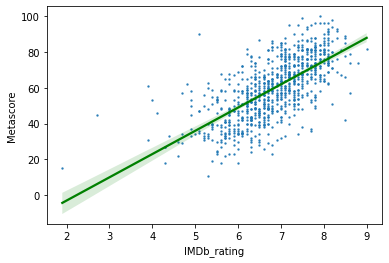

In [244]:
sns.regplot(data=movies, x='IMDb_rating', y='Metascore', scatter_kws={"s": 2}, line_kws={'color': 'green'})

# Positive relationship between two types of ratings.

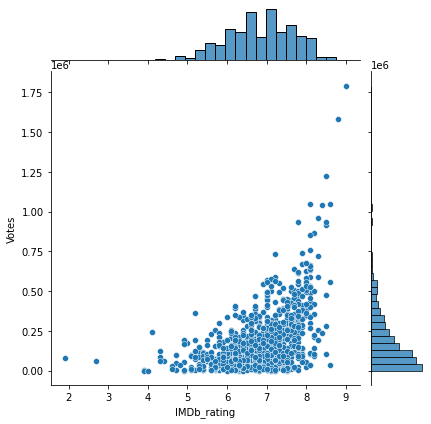

In [245]:
sns.jointplot(data=movies, x='IMDb_rating', y='Votes')

In [441]:
movies['Actors']

0      Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...
1      Noomi Rapace, Logan Marshall-Green, Michael Fa...
2      James McAvoy, Anya Taylor-Joy, Haley Lu Richar...
3      Matthew McConaughey,Reese Witherspoon, Seth Ma...
4      Will Smith, Jared Leto, Margot Robbie, Viola D...
                             ...                        
993    Milla Jovovich, Ali Larter, Wentworth Miller,K...
994    Thomas Mann, Oliver Cooper, Jonathan Daniel Br...
996    Lauren German, Heather Matarazzo, Bijou Philli...
997    Robert Hoffman, Briana Evigan, Cassie Ventura,...
999    Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...
Name: Actors, Length: 838, dtype: object

In [381]:
#movies['IMDb_rating'].value_counts()

<AxesSubplot:xlabel='IMDb_rating', ylabel='Revenue'>

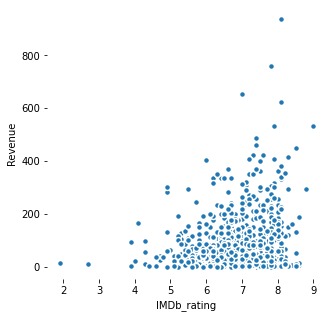

In [399]:
f, ax = plt.subplots(figsize=(5, 5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="IMDb_rating", y="Revenue",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=1.5,
                data=movies, ax=ax)

In [ ]:
## creating a new table

movies_dataframe = pd.DataFrame({'Revenue' : [20,30,40,25,55], 'IMDb_rating' : ['Bob', 'Carl', 'Tom', 'Vycka', 'John']}

In [418]:
movies['IMDb_rating'].info()

<class 'pandas.core.series.Series'>
Int64Index: 838 entries, 0 to 999
Series name: IMDb_rating
Non-Null Count  Dtype  
--------------  -----  
838 non-null    float64
dtypes: float64(1)
memory usage: 45.4 KB


In [407]:
from sklearn import linear_model

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
    host='localhost',
    port='3306',
    user='root',
    password='Labutis1997*'
)
cursor = mydb.cursor()
cursor.execute('USE sakila')
df = pd.read_sql('SELECT * FROM actor', con=mydb)
df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,actor_id,first_name,last_name,last_update
0,1,PENELOPE,GUINESS,2006-02-15 04:34:33
1,2,NICK,WAHLBERG,2006-02-15 04:34:33
2,3,ED,CHASE,2006-02-15 04:34:33
3,4,JENNIFER,DAVIS,2006-02-15 04:34:33
4,5,JOHNNY,LOLLOBRIGIDA,2006-02-15 04:34:33
...,...,...,...,...
195,196,BELA,WALKEN,2006-02-15 04:34:33
196,197,REESE,WEST,2006-02-15 04:34:33
197,198,MARY,KEITEL,2006-02-15 04:34:33
198,199,JULIA,FAWCETT,2006-02-15 04:34:33


In [ ]:
#infographics could illustrate the most popular genre and the most successful director,
# as well as their relationship with revenue, metascore and the count of the movies.

In [402]:
movies.to_csv('movies_cleaned.csv')